* CLIENTNUM - Customer_ID
* Attrition_Flag - Trạng thái khách hàng (target)
* Customer_Age - Tuổi khách hàng
* Gender - Giới tính
* Dependent_count - Số người phụ thuộc
* Education_Level - Trình độ học vấn
* Marital_Status - Tình trạng hôn nhân
* Income_Category - Thu nhập
* Card_Category - Loại thẻ thanh toán
* Months_on_book - Thời gian sử dụng dịch vụ của ngân hàng
* Total_Relationship_Count - Tổng số sản phẩm khách hàng sử dụng
* Months_Inactive_12_mon -  Số tháng không hoạt động trong 12 tháng qua
* Contacts_Count_12_mon - Số tháng liên hệ trong 12 tháng qua
* Credit_Limit - Hạn mức sử dụng trên thẻ tín dụng
* Total_Revolving_Bal - Tổng số dư quay vòng trên thẻ tín dụng
* Avg_Open_To_Buy - Hạn mức tín dụng trung bình (trung bình 12 tháng qua)
* Total_Amt_Chng_Q4_Q1 - Thay đổi về số tiền giao dịch (Q4 so với Q1)
* Total_Trans_Amt - Tổng giá trị giao dịch (12 tháng qua)
* Total_Trans_Ct - Số lượng giao dịch (12 tháng qua)
* Total_Ct_Chng_Q4_Q1 - Thay đổi về số lượng giao dịch (Q4 so với Q1)
* Avg_Utilization_Ratio - Tỉ lệ sử dụng thẻ trung bình

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
path = 'D:\AI\AI club\Churn_prediction\BankChurners.csv'
df = pd.read_csv(path)

In [249]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [250]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [252]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [253]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [254]:
df.drop_duplicates(inplace=True)

# Age mean,min,max of Attrition_Flag

In [255]:
df.groupby('Attrition_Flag')[['Customer_Age']].agg(('mean','min','max')) # -> the elderly tend to be existing

Customer_Age        
                          mean min max
Attrition_Flag                        
Attrited Customer    46.659496  26  68
Existing Customer    46.262118  26  73

# Gender counting in Attrition_Flag 

In [256]:
df.groupby('Attrition_Flag')['Gender'].count()

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: Gender, dtype: int64

# Female counting in Existing Customer

In [257]:
df[(df['Gender'] == 'F') & (df['Attrition_Flag'] == 'Existing Customer')]['Attrition_Flag'].count() # -> More women use the service than men 

4428

# Feature engineering 

In [258]:
def agelabel(x):
    if x <= 26:
        return 'Young'
    elif x > 26 and x <= 41:
        return 'Middle Age'
    elif x > 41 and x <= 52:
        return 'Older Adults'
    else:
        return 'the elderly'
df['Age_Rank'] = df['Customer_Age'].apply(agelabel)

In [259]:
df['Income_Category'].replace('Unknown', pd.NA, inplace=True)
df.dropna(subset=['Income_Category'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15736\4047127589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income_Category'].replace('Unknown', pd.NA, inplace=True)


In [260]:
df['Mean_Income'] = df['Income_Category'].map(
    {
        'Less than $40K': 19825,
        '$60K - $80K': 70000,
        '$40K - $60K': 50000,
        '$80K - $120K': 100000,
        'Larger than $120K': 160000
        
    }
)

In [261]:
df['Attrition_Flag'] = df['Attrition_Flag'].map(
    {'Attrited Customer': 0,
     'Existing Customer': 1
     }
)

In [262]:
df.dropna(subset=['Mean_Income'], inplace=True)
df.drop(columns='Income_Category', inplace=True)

In [263]:
y = df['Attrition_Flag']
X = df.drop(columns=['Attrition_Flag'])

In [264]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

# Transform

In [265]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [266]:
Category = X.select_dtypes(include='object').columns.to_list()
Numerical = X.select_dtypes(include=('float64','int64')).columns.to_list()

In [267]:
print(f'Categories: {Category}')
print(f'Numeric: {Numerical}')

Categories: ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'Age_Rank']
Numeric: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Mean_Income']


In [268]:
stan = StandardScaler()
X[Numerical] = stan.fit_transform(X[Numerical])

# Create an instance of OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
cate_onehot = enc.fit_transform(X[Category])
cate_onehot = cate_onehot.toarray()
# Convert the sparse matrix to a DataFrame with appropriate column names
cate_onehot_df = pd.DataFrame(cate_onehot, columns=enc.get_feature_names_out(Category))

# Ensure the indices are consistent
X.reset_index(drop=True, inplace=True)
cate_onehot_df.reset_index(drop=True, inplace=True)

# Concatenate the numerical columns and the one-hot encoded categorical columns
X_final = pd.concat([X[Numerical], cate_onehot_df], axis=1)


In [269]:
X_final.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Age_Rank_Middle Age,Age_Rank_Older Adults,Age_Rank_Young,Age_Rank_the elderly
0,0.798198,-0.152253,0.501351,0.393247,0.762041,-1.326487,0.499846,0.633905,-0.476397,0.681118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.151398,0.346610,2.033503,1.020916,1.405262,-1.326487,-0.404284,0.088020,-0.369303,0.124870,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.686589,0.596042,0.501351,0.016646,0.118819,-1.326487,-2.212542,-0.507468,-1.432856,-0.363969,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.828165,-0.775832,1.267427,-0.234421,-0.524403,1.648597,-1.308413,-0.520392,1.665479,-0.686500,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.818640,-0.775832,0.501351,-1.866360,0.762041,-1.326487,-2.212542,-0.347703,-1.432856,-0.204303,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Check unbalanced data

In [270]:
y.value_counts()

Attrition_Flag
1    6974
0    1314
Name: count, dtype: int64

# Train_test_split

In [271]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, shuffle=True)

# Upsampling

In [273]:
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 5595, 0: 5595})


In [274]:
X_train.shape,X_test.shape

((6630, 37), (1658, 37))

# Training

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [276]:
model = []

model.append(('Randomforest', RandomForestClassifier()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('Logistic', LogisticRegression()))
model.append(('SVC', SVC()))
print('Model: {}'.format(model))

Model: [('Randomforest', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('Logistic', LogisticRegression()), ('SVC', SVC())]


# Cross_validation

In [277]:
model_names = []
scores = []
# Creating a for loop to see cross validation scores for every model above:
np.random.seed(42)
for names, models in model:
    score = cross_val_score(models, X_res, y_res, cv=4, scoring='accuracy')
    scores.append(score)
    model_names.append(models)
    print(f"Mean of the {names} model scores : {score.mean()}")

Mean of the Randomforest model scores : 0.9774808184404664
Mean of the KNN model scores : 0.9121545523987586
Mean of the Logistic model scores : 0.856301221849306
Mean of the SVC model scores : 0.9486155837345385


# Predict Prob

In [278]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [279]:
random_iterations  = np.random.randint(100)
roc_auc_train = []
roc_auc_test = []
random_seeds = []
for i in range(random_iterations):
    rdf = RandomForestClassifier(random_state=i, class_weight='balanced', n_estimators=100).fit(X_res, y_res)
    # Predict probabilities on the training set
    y_train_proba = rdf.predict_proba(X_res)
    
    roc_auc_train.append(roc_auc_score(y_res, y_train_proba[:, 1]))
    
    # Predict probabilities on the test set
    y_test_proba = rdf.predict_proba(X_test)
    roc_auc_test.append(roc_auc_score(y_test, y_test_proba[:, 1]))
    
    # Append the random seeds to the respective list
    random_seeds.append(i)

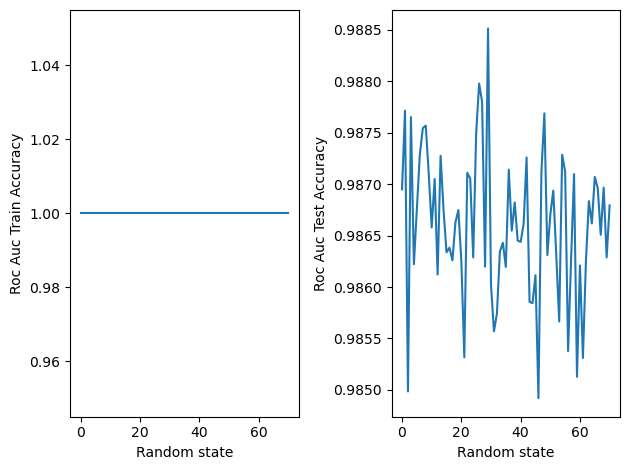

In [280]:
def rdf_plot(acc_score_train, acc_score_test):
    plt.subplot(121)
    plt.plot(acc_score_train)
    plt.xlabel('Random state')
    plt.ylabel('Roc Auc Train Accuracy')
    plt.subplot(122)
    plt.plot(acc_score_test)
    plt.xlabel('Random state')
    plt.ylabel('Roc Auc Test Accuracy')
    plt.tight_layout()
rdf_plot(roc_auc_train, roc_auc_test)

In [281]:
# Convert probabilities to class predictions
y_train_pred = np.argmax(y_train_proba, axis=1) 
y_test_pred = np.argmax(y_test_proba, axis=1) 

In [282]:
print(f'Report metrics on Train: {classification_report(y_res, y_train_pred)}')
print(f'Report metrics on Test: {classification_report(y_test, y_test_pred)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5595
           1       1.00      1.00      1.00      5595

    accuracy                           1.00     11190
   macro avg       1.00      1.00      1.00     11190
weighted avg       1.00      1.00      1.00     11190

Report metrics on Test:               precision    recall  f1-score   support

           0       0.84      0.89      0.86       279
           1       0.98      0.97      0.97      1379

    accuracy                           0.95      1658
   macro avg       0.91      0.93      0.92      1658
weighted avg       0.95      0.95      0.95      1658



# Feature Selection

In [283]:
feature_list = []
feature_scores = rdf.feature_importances_
print("Feature : Score")
for feature, score in zip(X_res.columns, feature_scores):
    print(f"{feature}: {score}")
    if score >= 0.05:
        feature_list.append(feature)

Feature : Score
CLIENTNUM: 0.015683637362700304
Customer_Age: 0.02006721548774839
Dependent_count: 0.014012167101555943
Months_on_book: 0.01552637421671799
Total_Relationship_Count: 0.05202527309230065
Months_Inactive_12_mon: 0.043178893882054835
Contacts_Count_12_mon: 0.04232698994383293
Credit_Limit: 0.02124197399917587
Total_Revolving_Bal: 0.09697973909663721
Avg_Open_To_Buy: 0.022349484751256882
Total_Amt_Chng_Q4_Q1: 0.04540877099495856
Total_Trans_Amt: 0.16116283516765176
Total_Trans_Ct: 0.22469263163898046
Total_Ct_Chng_Q4_Q1: 0.07982376175765633
Avg_Utilization_Ratio: 0.044143844043439955
Mean_Income: 0.010174162667932286
Gender_F: 0.007026199838284742
Gender_M: 0.00866619556835227
Education_Level_College: 0.0032393788648663623
Education_Level_Doctorate: 0.0019198686250835914
Education_Level_Graduate: 0.008581947170178733
Education_Level_High School: 0.005519464963659945
Education_Level_Post-Graduate: 0.004216642067560545
Education_Level_Uneducated: 0.00431453120132788
Education

In [284]:
feature_list

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [285]:
X_res = X_res[feature_list]

In [286]:
X_test = X_test[feature_list]

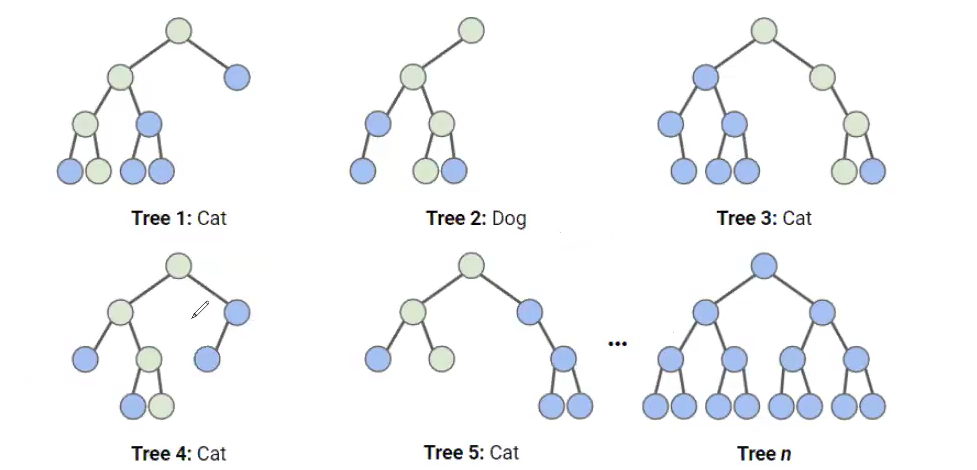

In [287]:
log_loss_train_rdf = []
log_loss_test_rdf = []
roc_auc_train_rdf = []
roc_auc_test_rdf = []
max_depth_rdf = []
for i in range(1, random_iterations):
    rdfs = RandomForestClassifier(
        random_state=i,
        max_depth=i,
        n_estimators=100).fit(X_res, y_res)
    # Predict probabilities on the training set
    y_train_proba_rdf = rdfs.predict_proba(X_res)
    roc_auc_train_rdf.append(roc_auc_score(y_res, y_train_proba_rdf[:, 1]))
    
    # Predict probabilities on the test set
    y_test_proba_rdf = rdfs.predict_proba(X_test)
    roc_auc_test_rdf.append(roc_auc_score(y_test, y_test_proba_rdf[:, 1]))
    max_depth_rdf.append(i)

In [288]:
X_test.shape

(1658, 5)

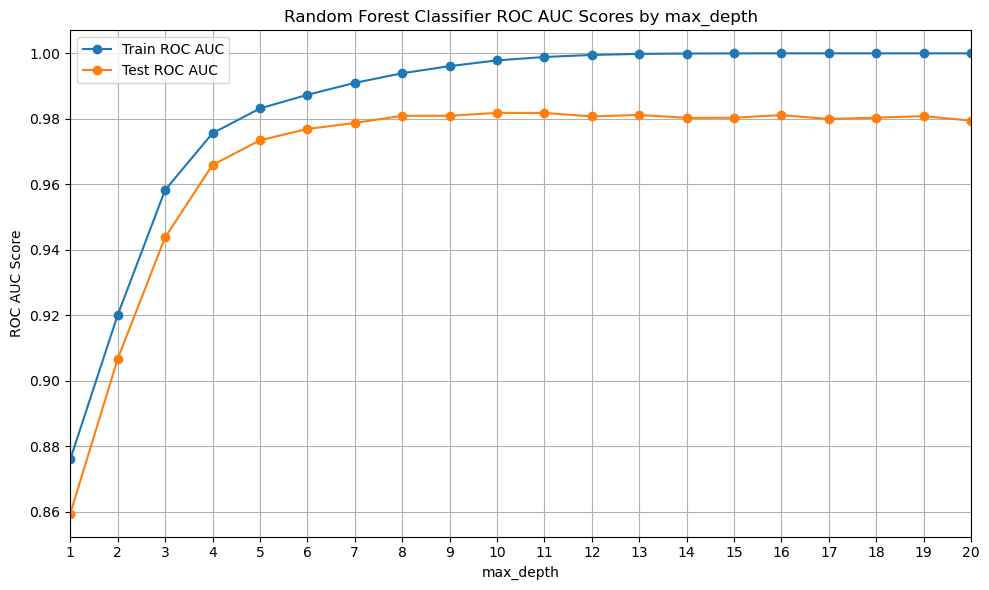

In [289]:
def rdf_plot(acc_score_train, acc_score_test, max_depth_rdf):
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_rdf, acc_score_train, marker='o', label='Train ROC AUC')
    plt.plot(max_depth_rdf, acc_score_test, marker='o', label='Test ROC AUC')
    plt.title('Random Forest Classifier ROC AUC Scores by max_depth')
    plt.xlabel('max_depth')
    plt.ylabel('ROC AUC Score')
    plt.xticks(max_depth_rdf)
    plt.xlim((1,20))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
rdf_plot(roc_auc_train_rdf, roc_auc_test_rdf, max_depth_rdf)

In [290]:
rdfs_new = RandomForestClassifier(
    random_state=42,
    max_depth=10,
    n_estimators=500
    ).fit(X_res, y_res)
# Predict probabilities on the training set
y_train_proba_rdf_new = rdfs_new.predict_proba(X_res)
# Predict probabilities on the test set
y_test_proba_rdf_new = rdfs_new.predict_proba(X_test)


In [335]:
print(f'Report metrics on Train: {classification_report(y_res, y_train_proba_rdf_new[:, 1] >= 0.5)}')
print(f'Report metrics on Test: {classification_report(y_test, y_test_proba_rdf_new[:, 1] >= 0.5)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5595
           1       0.98      0.97      0.98      5595

    accuracy                           0.98     11190
   macro avg       0.98      0.98      0.98     11190
weighted avg       0.98      0.98      0.98     11190

Report metrics on Test:               precision    recall  f1-score   support

           0       0.76      0.92      0.83       279
           1       0.98      0.94      0.96      1379

    accuracy                           0.94      1658
   macro avg       0.87      0.93      0.90      1658
weighted avg       0.94      0.94      0.94      1658



# Inference on testset with Randomforest

In [336]:
y_test_proba_rdf_new_classify = np.argmax(y_test_proba_rdf_new, axis=1)

In [337]:
df_rdf_test = pd.DataFrame(
    {
     'Test True': y_test,
     'Test Predict': y_test_proba_rdf_new[:, 1] >= 0.5,
     }
    
)

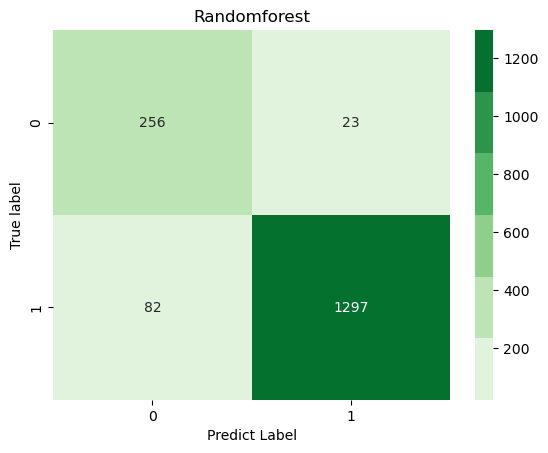

In [338]:
colormap = sns.color_palette("Greens")
sns.heatmap(confusion_matrix(df_rdf_test['Test True'], df_rdf_test['Test Predict']), annot=True, fmt='d', cmap=colormap)
plt.title('Randomforest')
plt.xlabel('Predict Label')
plt.ylabel('True label');

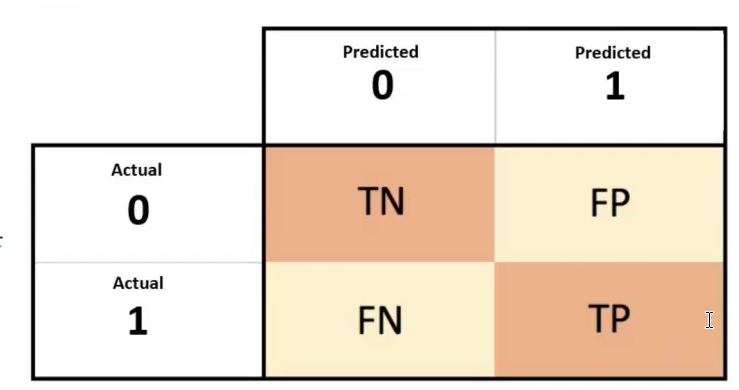

# Accuracy

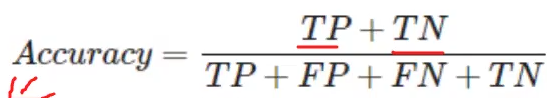

# Precision

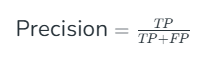

# Recall

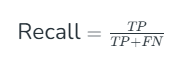

# F1 score

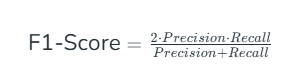

# Logistic Regression

In [339]:
from sklearn.linear_model import LogisticRegression

In [340]:
logistic = LogisticRegression(
    fit_intercept=True,
    random_state=42,
    penalty='l2'
    ).fit(X_res, y_res)
y_train_proba_lgts = logistic.predict_proba(X_res)[:, 1]
y_test_proba_lgts = logistic.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold 
y_train_pred_lgts = (y_train_proba_lgts >= 0.55).astype(int)
y_test_pred_lgts = (y_test_proba_lgts >= 0.25).astype(int)
  

In [341]:
print(f'Report metrics on Train: {classification_report(y_res, y_train_pred_lgts)}')
print(f'Report metrics on Test: {classification_report(y_test, y_test_pred_lgts)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       0.82      0.86      0.84      5595
           1       0.85      0.81      0.83      5595

    accuracy                           0.83     11190
   macro avg       0.83      0.83      0.83     11190
weighted avg       0.83      0.83      0.83     11190

Report metrics on Test:               precision    recall  f1-score   support

           0       0.64      0.66      0.65       279
           1       0.93      0.92      0.93      1379

    accuracy                           0.88      1658
   macro avg       0.78      0.79      0.79      1658
weighted avg       0.88      0.88      0.88      1658



# Inference on testset with Logistic Regression

In [342]:
df_lgt_test = pd.DataFrame(
    {
     'Test True': y_test,
     'Test Predict': y_test_pred_lgts >= 0.25,
     }
    
)


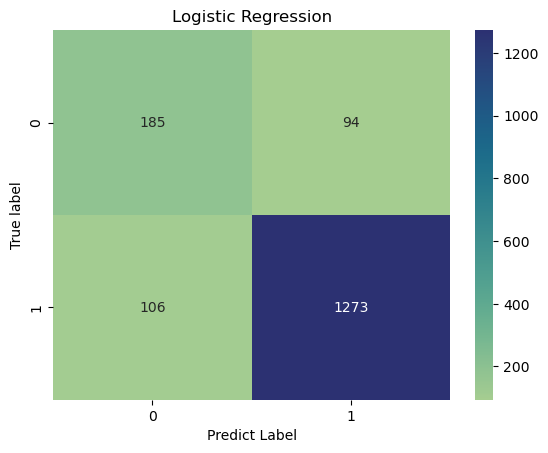

In [343]:
sns.heatmap(confusion_matrix(df_lgt_test['Test True'], df_lgt_test['Test Predict']), annot=True, fmt='d', cmap='crest')
plt.title('Logistic Regression')
plt.xlabel('Predict Label')
plt.ylabel('True label');

# Eliminating outlier

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8288 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8288 non-null   int64  
 1   Attrition_Flag            8288 non-null   int64  
 2   Customer_Age              8288 non-null   int64  
 3   Gender                    8288 non-null   object 
 4   Dependent_count           8288 non-null   int64  
 5   Education_Level           8288 non-null   object 
 6   Marital_Status            8288 non-null   object 
 7   Card_Category             8288 non-null   object 
 8   Months_on_book            8288 non-null   int64  
 9   Total_Relationship_Count  8288 non-null   int64  
 10  Months_Inactive_12_mon    8288 non-null   int64  
 11  Contacts_Count_12_mon     8288 non-null   int64  
 12  Credit_Limit              8288 non-null   float64
 13  Total_Revolving_Bal       8288 non-null   int64  
 14  Avg_Open_To_

In [301]:
df_new = pd.concat([df, df['Gender'].str.get_dummies(), df['Age_Rank'].str.get_dummies(), df['Education_Level'].str.get_dummies(), df['Marital_Status'], df['Card_Category'].str.get_dummies()], axis=1)
df_new = df_new.drop("Gender",axis=1)
df_new = df_new.drop("Age_Rank",axis=1)
df_new = df_new.drop("Education_Level",axis=1)
df_new = df_new.drop("Marital_Status",axis=1)
df_new = df_new.drop("Card_Category",axis=1)

In [302]:
df_new.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown,Blue,Gold,Platinum,Silver
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,0,1,0,0,0,0,1,0,0,0
2,713982108,1,51,3,36,4,1,0,3418.0,0,...,0,1,0,0,0,0,1,0,0,0
3,769911858,1,40,4,34,3,4,1,3313.0,2517,...,0,0,1,0,0,0,1,0,0,0
4,709106358,1,40,3,21,5,1,0,4716.0,0,...,0,0,0,0,1,0,1,0,0,0


In [303]:
#z-score
z_scores = np.abs((df_new - df_new.mean()) / df_new.std())
for threshold in range(0, 10):
    df_no_outliers = df_new[(z_scores <= threshold).all(axis=1)]
    print(f"Tập dữ liệu trước khi loại bỏ Outliers có dạng: {df.shape}")
    print(f"Tập dữ liệu sau khi loại bỏ Outliers có dạng: {df_no_outliers.shape}")

Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (0, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (0, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (1210, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (6344, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (6886, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (8078, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (8097, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (8111, 34)
Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi

In [304]:
df_no_outliers = df_new[(z_scores <= 5).all(axis=1)]
print(f"Tập dữ liệu trước khi loại bỏ Outliers có dạng: {df.shape}")
print(f"Tập dữ liệu sau khi loại bỏ Outliers có dạng: {df_no_outliers.shape}")

Tập dữ liệu trước khi loại bỏ Outliers có dạng: (8288, 22)
Tập dữ liệu sau khi loại bỏ Outliers có dạng: (8078, 34)


In [305]:
df_no_outliers['Attrition_Flag'].value_counts()

Attrition_Flag
1    6791
0    1287
Name: count, dtype: int64

* -> Outlier more than 5% -> cannot eliminate
* -> unbalanced data

In [306]:
y = df_no_outliers['Attrition_Flag']
X_new = df_no_outliers.drop('Attrition_Flag', axis=1)

In [307]:
X_new_numeric = X_new.select_dtypes(include=('float64', 'int64')).columns.tolist()

In [308]:
for numeric in X_new_numeric:
    X_new[numeric]=stan.fit_transform(X_new[[numeric]])

# Train test split

In [309]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42, shuffle=True)

In [310]:
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_res_new, y_res_new = sm.fit_resample(X_train_new, y_train_new)
print('Resampled dataset shape %s' % Counter(y_res_new))

Resampled dataset shape Counter({1: 5436, 0: 5436})


In [311]:
rdfs_no_outlier = RandomForestClassifier(
    random_state=42
    ).fit(X_res_new, y_res_new)
# Predict probabilities on the training set
y_train_proba_rdf_new_no_outlier = rdfs_no_outlier.predict_proba(X_res_new)
# Predict probabilities on the test set
y_test_proba_rdf_new_no_outlier = rdfs_no_outlier.predict_proba(X_test_new)


In [312]:
y_train_proba_rdf_no_outlier_classify = np.argmax(y_train_proba_rdf_new_no_outlier, axis=1)
y_test_proba_rdf_new_no_outlier_classify = np.argmax(y_test_proba_rdf_new_no_outlier, axis=1)

In [313]:
print(f'Report metrics on Train: {classification_report(y_res_new, y_train_proba_rdf_no_outlier_classify)}')
print(f'Report metrics on Test: {classification_report(y_test_new, y_test_proba_rdf_new_no_outlier_classify)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      5436

    accuracy                           1.00     10872
   macro avg       1.00      1.00      1.00     10872
weighted avg       1.00      1.00      1.00     10872

Report metrics on Test:               precision    recall  f1-score   support

           0       0.86      0.85      0.85       261
           1       0.97      0.97      0.97      1355

    accuracy                           0.95      1616
   macro avg       0.92      0.91      0.91      1616
weighted avg       0.95      0.95      0.95      1616



In [314]:
feature_list_no_outlier = []
feature_scores_no_outlier = rdfs_no_outlier.feature_importances_
print("Feature : Score")
for feature, score in zip(X_res_new.columns, feature_scores_no_outlier):
    print(f"{feature}: {score}")
    if score >= 0.05:
        feature_list_no_outlier.append(feature)

Feature : Score
CLIENTNUM: 0.019790407824646267
Customer_Age: 0.020318724414995697
Dependent_count: 0.019341443944829655
Months_on_book: 0.01841960716878537
Total_Relationship_Count: 0.05386960152829293
Months_Inactive_12_mon: 0.057517452544767034
Contacts_Count_12_mon: 0.056471804752727256
Credit_Limit: 0.023647302936298294
Total_Revolving_Bal: 0.09757173608262962
Avg_Open_To_Buy: 0.027824503188748958
Total_Amt_Chng_Q4_Q1: 0.04051096776100548
Total_Trans_Amt: 0.1544802322741884
Total_Trans_Ct: 0.20685414453431433
Total_Ct_Chng_Q4_Q1: 0.09735094606940944
Avg_Utilization_Ratio: 0.04862636789035072
Mean_Income: 0.015233310369208261
F: 0.0076020007546087395
M: 0.005688682138625344
Middle Age: 0.003114955156671656
Older Adults: 0.005293682917403036
Young: 0.0
the elderly: 0.0031659490030642836
College: 0.0020190956291283118
Doctorate: 0.0010555673520017369
Graduate: 0.002856030565927122
High School: 0.0028545773717952427
Post-Graduate: 0.001581456278731501
Uneducated: 0.002423522401333312


In [315]:
X_res_new = X_res_new[feature_list_no_outlier]
X_test_new = X_test_new[feature_list_no_outlier]

In [316]:
def no_outlier_model(
                    X_train,
                    X_test,
                    y_train,
                    y_test
                     ):
    roc_auc_train_rdf_no_outlier = []
    roc_auc_test_rdf_no_outlier = []
    max_depth_rdf_no_outlier = []
    for i in range(1, random_iterations):
        rdfs_no_outlier_new = RandomForestClassifier(
            random_state=42,
            max_depth=i,
            n_estimators=100).fit(X_train, y_train)
        # Predict probabilities on the training set
        y_train_proba_rdf_no_outlier_new = rdfs_no_outlier_new.predict_proba(X_train)
        roc_auc_train_rdf_no_outlier.append(roc_auc_score(y_train, y_train_proba_rdf_no_outlier_new[:, 1]))
        
        # Predict probabilities on the test set
        y_test_proba_rdf_no_outlier_new = rdfs_no_outlier_new.predict_proba(X_test)
        roc_auc_test_rdf_no_outlier.append(roc_auc_score(y_test, y_test_proba_rdf_no_outlier_new[:, 1]))
        max_depth_rdf_no_outlier.append(i)
    return roc_auc_train_rdf_no_outlier, roc_auc_test_rdf_no_outlier, max_depth_rdf_no_outlier

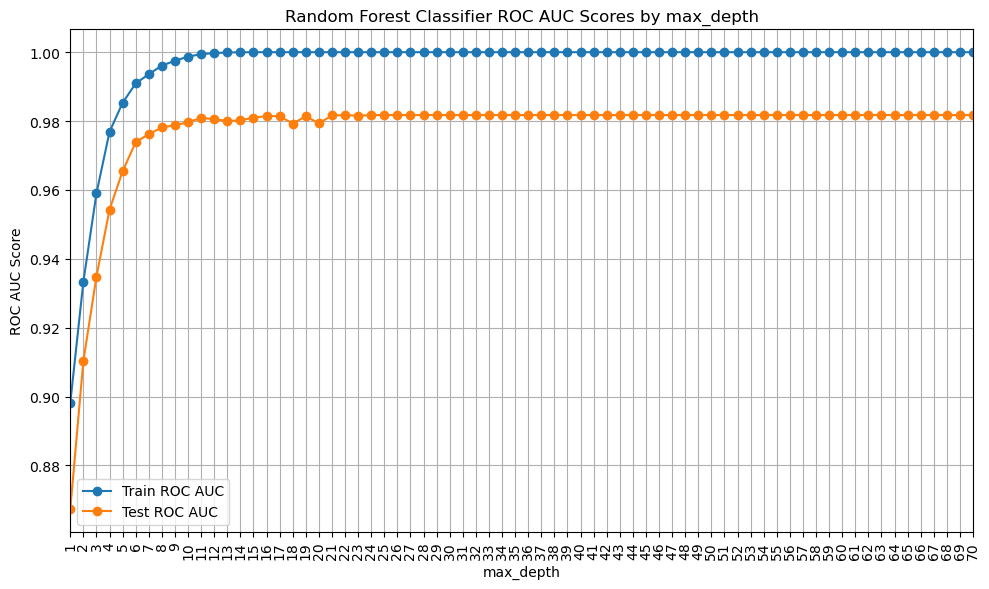

In [317]:
def rdf_plot(
            acc_score_train,
            acc_score_test,
            max_depth_rdf
             ):
    
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_rdf, acc_score_train, marker='o', label='Train ROC AUC')
    plt.plot(max_depth_rdf, acc_score_test, marker='o', label='Test ROC AUC')
    plt.title('Random Forest Classifier ROC AUC Scores by max_depth')
    plt.xlabel('max_depth')
    plt.ylabel('ROC AUC Score')
    plt.xticks(max_depth_rdf, rotation = 90)
    plt.xlim((1,70))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
auc_train, auc_test, maxdepth = no_outlier_model(X_res_new, X_test_new, y_res_new, y_test_new)
rdf_plot(auc_train, auc_test, maxdepth)

In [322]:
rdfs_change_maxdepth = RandomForestClassifier(
    random_state=42,
    max_depth=70,
    n_estimators=100
    ).fit(X_res_new, y_res_new)
# Predict probabilities on the training set
y_train_proba_rdf_new_maxdepth = rdfs_change_maxdepth.predict_proba(X_res_new)
# Predict probabilities on the test set
y_test_proba_rdf_new_maxdepth = rdfs_change_maxdepth.predict_proba(X_test_new)


In [323]:
y_train_pred_maxdepth = (y_train_proba_rdf_new_maxdepth[:, 1] >= 0.5).astype(int)
y_test_pred_maxdepth = (y_test_proba_rdf_new_maxdepth[:, 1] >= 0.5).astype(int)

In [324]:
print(f'Report metrics on Train: {classification_report(y_res_new, y_train_pred_maxdepth)}')
print(f'Report metrics on Test: {classification_report(y_test_new, y_test_pred_maxdepth)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      5436

    accuracy                           1.00     10872
   macro avg       1.00      1.00      1.00     10872
weighted avg       1.00      1.00      1.00     10872

Report metrics on Test:               precision    recall  f1-score   support

           0       0.83      0.85      0.84       261
           1       0.97      0.97      0.97      1355

    accuracy                           0.95      1616
   macro avg       0.90      0.91      0.91      1616
weighted avg       0.95      0.95      0.95      1616



Text(0.5, 1.0, 'Distribution of data')

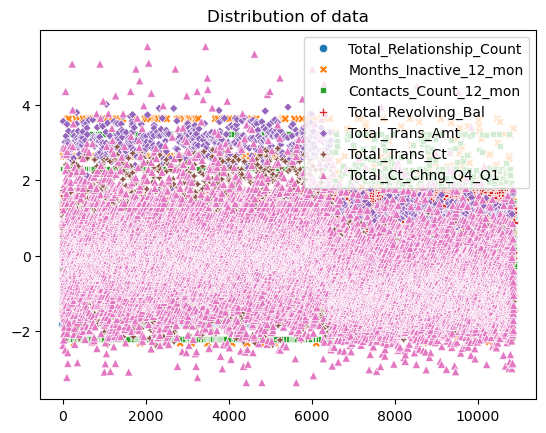

In [344]:
sns.scatterplot(X_res_new)
plt.title('Distribution of data')

-> Overfiting by high variance

-> Outlier will affect our data -> outlier appears more than 5% -> keep that outlier 